<center>
<h1>Conservation of Momentum and Kinetic Energy</h1>
George Luan
04/2022 (updated 08/2022)

Lab Mates: Anthony Baselious and Angela Wang
</center>

We actually collected a couple sets of data for elastic/inelastic collisions under different circumstances. I was in charge of analyzing the data for the elastic collision. [This picture](https://drive.google.com/file/d/1_jB7KiibdTmpttZ_WDErG5MMfRmL0QQW/view?usp=sharing) shows the basic setup.

Load in the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


Load in the data files. We have two files, one for mass $m_1$ and the other for mass $m_2$. Load the files and use ; as the delimiter.

In [3]:
read_in_array_m1 = np.loadtxt('/content/drive/MyDrive/Air Track Data/Copy_of_m1_elastic.txt',delimiter=';')

read_in_array_m2 = np.loadtxt('/content/drive/MyDrive/Air Track Data/Copy_of_M2_Elastic_collisions.txt',delimiter=';')


Extract the time and the position for both the files.

In [4]:
time_m1 = read_in_array_m1[:,0]

time_m2 = read_in_array_m2[:,0]

position_m1 = read_in_array_m1[:,1]

position_m2 = read_in_array_m2[:,1]


I did not do this for the original assignment, but I think defining a WindowGenerator class will make the windowing process convenient.

In [5]:
class WindowGenerator:

  def __init__(self, x, y, xlabel="", ylabel="", title=""):
      self.x = x
      self.y = y
      self.xlabel = xlabel
      self.ylabel = ylabel
      self.title = title

  def plot_with_index(self):
      """
      This creates a wholesale view of the target data to help us visually find the desired interval.
      """
      plt.plot(self.y)
      plt.xlabel("Index")
      plt.ylabel(self.ylabel)
      plt.title("Wholesale Plot")
      plt.show()

  def select_window(self, lower_index, upper_index):
      """
      This function plots the data in the given interval and returns the x and y windows.
      With slight modifications, we can also catter plot the data. 
      """
      # The indices for the time are going to be same as that of the position
      x_window = self.x[lower_index:upper_index]
      y_window = self.y[lower_index:upper_index]
      plt.plot(x_window, y_window)
      plt.xlabel(self.xlabel)
      plt.ylabel(self.ylabel)
      plt.title(self.title)
      plt.show()

      return x_window, y_window

We initialize an instance of WindowGenerator for mass $m_1$.

In [6]:
m1_windowing = WindowGenerator(time_m1, position_m1, xlabel="Time (ms)", ylabel="Position (cm)", title="Position vs Time for $M_1$")

Now we can plot the position of $m_1$ vs the array index to find the pre-collision and post-collision points of interest for both the masses.

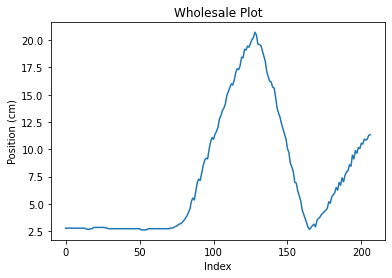

In [7]:
m1_windowing.plot_with_index()

We can then select our time window. We choose to ignore a few points just before the collision, so we let the lower index to be 0 and the upper index to be 75. This way we can get the points pre-collision. We now isolate the position and time array for pre-collision using the determined array index at the point of collision.  

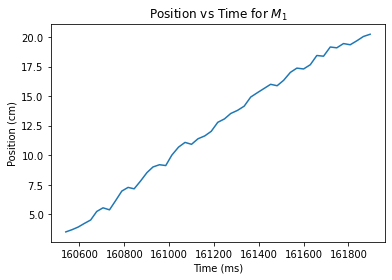

In [8]:
time_m1_pre, pos_m1_pre = m1_windowing.select_window(lower_index=80, upper_index=128)

We repeat the same process for the post-collision data.

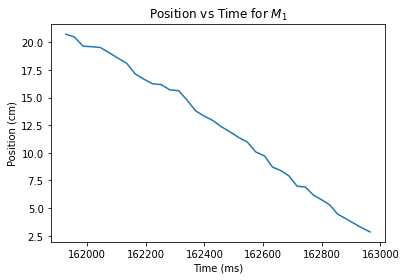

In [9]:
time_m1_post, pos_m1_post = m1_windowing.select_window(lower_index=128, upper_index=165)

Use np.polyfit() of degree 1 to find the velocity pre and post collision. Find the error in this velocity from the covariance matrix.

In [10]:
coeff_linear_pre_m1, cov_pre_m1 = np.polyfit(time_m1_pre, pos_m1_pre,1,cov=True)

# The slope of this curve is the velocity pre-collision
u1 = coeff_linear_pre_m1[0]

# The error in velocity is found from cov_pre
delta_u1 = np.sqrt(cov_pre_m1[0,0])

# Repeat the process to find the velocity and its error post-collision
# You can call the velocity v1 and its error as delta_v1
coeff_linear_post_m1, cov_post_m1 = np.polyfit(time_m1_post, pos_m1_post,1,cov=True)

# The slope of this curve is the velocity pre-collision
v1 = coeff_linear_post_m1[0]

# The error in velocity is found from cov_pre
delta_v1 = np.sqrt(cov_post_m1[0,0])






We now have 4 important values: 

i) velocity of $m_1$ pre-collision : mean $u_1$ error $\delta u_1$

ii) velocity of $m_1$ post-collision : mean $v_1$ error $\delta v_1$

We still need to find $u_2$, $\delta u_2$, $v_2$ and $\delta v_2$. We do this by repeating the process we did for u1 and v1.

In [11]:
# initialize an instance of WindowGenerator for m2
m2_windowing = WindowGenerator(time_m2, position_m2, xlabel="Time (ms)", ylabel="Position (cm)", title="Position vs Time for $M_2$")

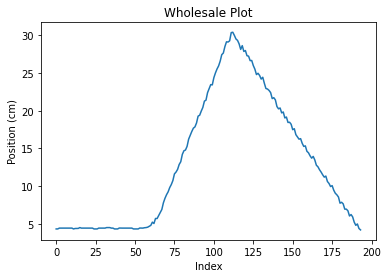

In [12]:
m2_windowing.plot_with_index()

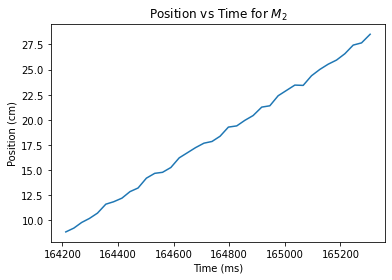

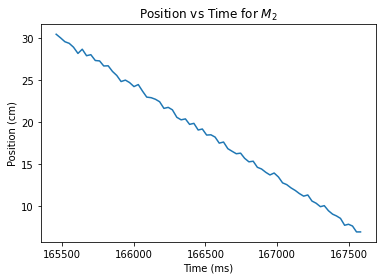

In [13]:
time_m2_pre, pos_m2_pre = m2_windowing.select_window(70, 108)

# Replace the ? with the start and end index of the post-collision data
time_m2_post, pos_m2_post = m2_windowing.select_window(112, 185)

# The indices for the time are going to be same as that of the position


In [14]:
# Find u2, v2 and associated errors using polyfit
coeff_linear_pre_m2, cov_pre_m2 = np.polyfit(time_m2_pre, pos_m2_pre,1,cov=True)

# The slope of this curve is the velocity pre-collision
u2 = coeff_linear_pre_m2[0]

# The error in velocity is found from cov_pre
delta_u2 = np.sqrt(cov_pre_m2[0,0])

# Repeat the process to find the velocity and its error post-collision
# You can call the velocity v1 and its error as delta_v1
coeff_linear_post_m2, cov_post_m2 = np.polyfit(time_m2_post, pos_m2_post,1,cov=True)

# The slope of this curve is the velocity pre-collision
v2 = coeff_linear_post_m2[0]

# The error in velocity is found from cov_pre
delta_v2 = np.sqrt(cov_post_m2[0,0])

Now we know 8 important values.

i) velocity of $m_1$ pre-collision : mean $u_1$ error $\delta u_1$

ii) velocity of $m_1$ post-collision : mean $v_1$ error $\delta v_1$

iii) velocity of $m_2$ pre-collision : mean $u_2$ error $\delta u_2$

iv) velocity of $m_2$ post-collision : mean $v_2$ error $\delta v_2$

Create variables for storing the mass of $m_1$ and $m_2$ as well as the associated $\delta m_1$ and $\delta m_2$.

$\delta m_1$ and $\delta m_2$ are the minimum measurements on the scale.

In [15]:
m1 = 436

m2 = 420

delta_m1 = 1

delta_m2 = 1


We now define the functions to find momentum, error in momentum, energy and error in energy.

In [16]:
# define momentum function
def momentum_function(m, v):
  # Indent starting here
  # Calculate p
  p = m * v
  # Return p
  return p

In [17]:
# define momentum error function
def momentum_uncertainty(m, v, delta_m, delta_v):
  # Indent starting here
  # Calculate delta_p
  delta_p = m * v * np.sqrt((delta_m / m) ** 2 + (delta_v / v) ** 2)
# Return delta_p
  return delta_p

In [18]:
# define energy function
def kinetic_energy_function(m, v):
  # Indent starting here
  # Calculate K
  K = 0.5 * m * (v ** 2)
  # Return K
  return K

In [19]:
# define energy error function
def energy_uncertainty(m, v, delta_m, delta_v):
# Indent starting here
# Calculate delta_K
  delta_K = (0.5 * m * (v ** 2)) * np.sqrt((delta_m/m) ** 2 + (2 * delta_v / v) ** 2)


# Return delta_K
  return delta_K

Now, call the functions on the values that you have. Remember that the order of inputs into the function call must be in exactly the same order as the function definition. 

# Momentum and errors

In [20]:
# Convert from cm/ms to m/s
u1 = u1 * 10
v1 = v1 * 10
u2 = u2 * 10
v2 = v2 * 10
delta_u1 = delta_u1 * 10
delta_v1 = delta_v1 * 10
delta_u2 = delta_u2 * 10
delta_v2 = delta_v2 * 10
# Convert from g to kg
m1 = m1/1000
m2 = m2/1000
delta_m1 = delta_m1/1000
delta_m2 = delta_m2/1000

In [21]:
print("M1's initial velocity is", u1, "m/s with an uncertainty of", delta_u1, "m/s.")
print("M1's final velocity is", v1, "m/s with an uncertainty of", delta_v1, "m/s.")
print("M2's initial velocity is", u2, "m/s with an uncertainty of", delta_u2, "m/s.")
print("M2's final velocity is", v2, "m/s with an uncertainty of", delta_v2, "m/s.")

M1's initial velocity is 0.1299645938275466 m/s with an uncertainty of 0.0014834317442216107 m/s.
M1's final velocity is -0.1796361777901787 m/s with an uncertainty of 0.002146430705357423 m/s.
M2's initial velocity is 0.1772908160200562 m/s with an uncertainty of 0.0010135355618102323 m/s.
M2's final velocity is -0.11016788963634988 m/s with an uncertainty of 0.000423952660139725 m/s.


In [22]:
# m1 initial momentum with error
p1i = momentum_function(m1, np.abs(u1))
delta_p1i = momentum_uncertainty(m1, abs(u1), delta_m1, np.abs(delta_u1))
print("M1's initial momentum is", p1i, "kg m/s", "with an error of", delta_p1i, "kg m/s")

M1's initial momentum is 0.05666456290881032 kg m/s with an error of 0.0006597047073494374 kg m/s


In [23]:
# m2 initial momentum with error
p2i = momentum_function(m2, u2)
delta_p2i = momentum_uncertainty(m2, u2, delta_m2, delta_u2)
print("M2's initial momentum is", p2i, "kg m/s", "with an error of", delta_p2i, "kg m/s")

M2's initial momentum is 0.0744621427284236 kg m/s with an error of 0.0004611287218863948 kg m/s


In [24]:
# m1 final momentum with error
p1f = momentum_function(m1, np.abs(v1))
delta_p1f = momentum_uncertainty(m1, np.abs(v1), delta_m1, np.abs(delta_v1))
print("M1's final momentum is", p1f, "kg m/s", "with an error of", delta_p1f, "kg m/s")

M1's final momentum is 0.07832137351651791 kg m/s with an error of 0.0009529285130798031 kg m/s


In [25]:
# m2 final momentum with error
p2f = momentum_function(m2, np.abs(v2))
delta_p2f = momentum_uncertainty(m2, np.abs(v2), delta_m2, np.abs(delta_v2))
print("M2's final momentum is", p2f, "kg m/s", "with an error of", delta_p2f, "kg m/s")

M2's final momentum is 0.04627051364726695 kg m/s with an error of 0.0002093856949867957 kg m/s


System momentum loss :

If the initial momentum and error of $m_1$ are $p_{1i}$ and $\delta p_{1i}$, initial momentum with error of $m_2$ are $p_{2i}$ and $\delta p_{2i}$, final momentum and error of $m_1$ are $p_{1f}$ and $\delta p_{1f}$, final momentum with error of $m_2$ are $p_{2f}$ and $\delta p_{2f}$ then,

The system momentum loss is $(p_{1i} + p_{2i}) - (p_{1f} + p_{2f})$

The error in system momentum loss is $ \sqrt {({\delta p_{1i}})^2 + ({\delta p_{2i}})^2 + ({\delta p_{1f}})^2 +({\delta p_{2f}})^2} $

In [26]:
# System momentum loss
system_momentum_loss = (p1i+p2i - p1f - p2f)
print("The system momentum loss is", system_momentum_loss)
# Error in system momentum loss
error_system_momentum_loss = np.sqrt(delta_p1i**2 + delta_p2i**2 + delta_p1f**2 + delta_p2f**2)
print("The error in system momentum loss is", error_system_momentum_loss)

The system momentum loss is 0.0065348184734490555
The error in system momentum loss is 0.001264818215931908


# Energy and errors

Follow the procedure outlined in the momentum section and find the energies and associated errors.

Note that $\delta K = K*\sqrt{\left(\frac{\delta m}{m}\right)^2 + \left(\frac{2 \delta v}{v}\right)^2}$

In [27]:
# m1 initial energy with error
E1i = kinetic_energy_function(m1, u1)
delta_E1i = energy_uncertainty(m1, u1, delta_m1, delta_u1)
print("M1's initial energy is", E1i, "J", "with an error of", delta_E1i, "J")

M1's initial energy is 0.003682193451429498 J with an error of 8.448120514933488e-05 J


Find the system energy loss and its associated error.

In [28]:
# m2 initial energy with error
E2i = kinetic_energy_function(m2, u2)
delta_E2i = energy_uncertainty(m2, u2, delta_m2, delta_u2)
print("M2's initial energy is", E2i, "J", "with an error of", delta_E2i, "J")

M2's initial energy is 0.006600727023462057 J with an error of 7.708903008265622e-05 J


In [29]:
# m1 final energy with error
E1f = kinetic_energy_function(m1, v1)
delta_E1f = energy_uncertainty(m1, v1, delta_m1, delta_v1)
print("M1's final energy is", E1f, "J", "with an error of", delta_E1f, "J")

M1's final energy is 0.007034676088892103 J with an error of 0.00016888388839659372 J


In [30]:
# m2 final energy with error
E2f = kinetic_energy_function(m2, v2)
delta_E2f = energy_uncertainty(m2, v2, delta_m2, delta_v2)
print("M2's final energy is", E2f, "J", "with an error of", delta_E2f, "J")

M2's final energy is 0.0025487624204546633 J with an error of 2.0533724301893915e-05 J


In [31]:
# System momentum loss
system_energy_loss = (E1i+E2i - E1f - E2f)
print("The energy loss is", system_energy_loss)
# Error in system momentum loss
error_system_energy_loss = np.sqrt(delta_E1i**2 + delta_E2i**2 + delta_E1f**2 + delta_E2f**2)
print("The error in system energy loss is", error_system_energy_loss)

The energy loss is 0.0006994819655447878
The error in system energy loss is 0.00020499559550445954
